In [3]:
import pandas as pd

# Replace 'path/to/your/dataset.csv' with the actual path to your CSV file
df = pd.read_csv(r"C:\Users\ril\OneDrive\Desktop\Twitter_Data.csv")

# Display the first few rows of the DataFrame to verify the data
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
import pandas as pd
from textblob import TextBlob

# Assuming 'clean_text' is the column containing tweet text
df['clean_text'] = df['clean_text'].astype(str)  # Ensure 'clean_text' is of string type
df['sentiment_textblob'] = df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['binary_sentiment_textblob'] = df['sentiment_textblob'].apply(lambda x: 1 if x > 0 else 0)


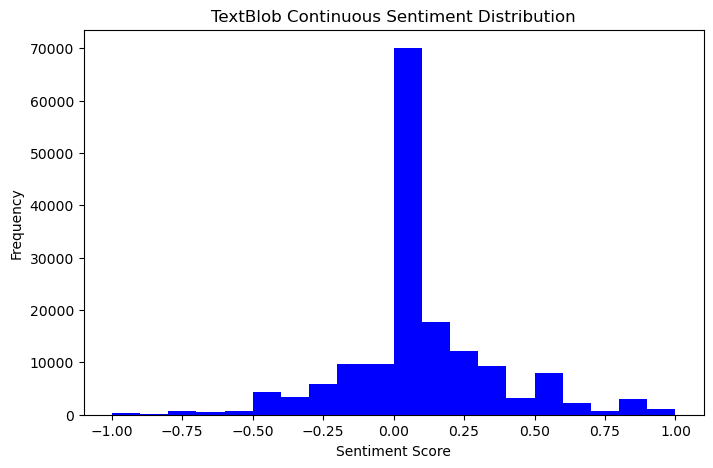

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiments (continuous scores)
plt.figure(figsize=(8, 5))
df['sentiment_textblob'].plot(kind='hist', color='blue', bins=20)
plt.title('TextBlob Continuous Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.show()


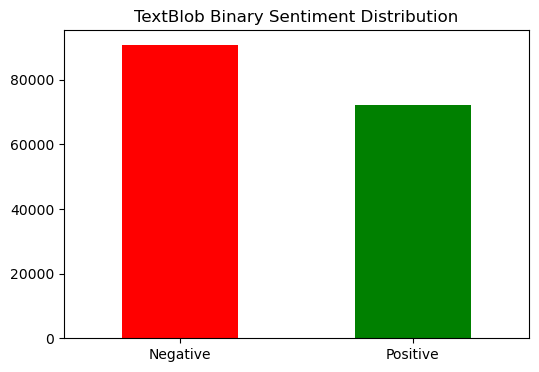

In [6]:
# Plot the distribution of sentiments (binary labels)
plt.figure(figsize=(6, 4))
df['binary_sentiment_textblob'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('TextBlob Binary Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['binary_sentiment_textblob'], test_size=0.2, random_state=42)


In [9]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [11]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     18213
           1       0.86      0.68      0.76     14383

    accuracy                           0.81     32596
   macro avg       0.82      0.79      0.80     32596
weighted avg       0.82      0.81      0.80     32596


Confusion Matrix:
[[16645  1568]
 [ 4673  9710]]


In [16]:
# Example of predicting sentiment for a new text
new_text = " worst product ever i have used"

# Transform the new text using the TF-IDF vectorizer
new_text_tfidf = vectorizer.transform([new_text])

# Make a prediction using the trained model
predicted_sentiment = classifier.predict(new_text_tfidf)[0]

# Display the predicted sentiment
if predicted_sentiment == 1:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")


Predicted Sentiment: Negative


In [17]:
# Assuming 'clean_text' is the column containing tweet text
df['clean_text'] = df['clean_text'].astype(str)  # Ensure 'clean_text' is of string type

# Transform the text using the TF-IDF vectorizer
X_tfidf = vectorizer.transform(df['clean_text'])

# Make predictions using the trained model
df['predicted_sentiment'] = classifier.predict(X_tfidf)

# Display the DataFrame with predicted sentiments
df[['clean_text', 'predicted_sentiment']]


,clean_text,predicted_sentiment
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,1
...,...,...
162975,why these 456 crores paid neerav modi not reco...,0
162976,dear rss terrorist payal gawar what about modi...,0
162977,did you cover her interaction forum where she ...,0
162978,there big project came into india modi dream p...,0


In [18]:
# Assuming 'predicted_sentiment' is the column containing predicted sentiments
positive_tweets = df[df['predicted_sentiment'] == 1]

# Display positive tweets
positive_tweets[['clean_text', 'predicted_sentiment']]


,clean_text,predicted_sentiment
2,what did just say vote for modi welcome bjp t...,1
4,answer who among these the most powerful world...,1
8,with upcoming election india saga going import...,1
9,gandhi was gay does modi,1
11,hope tuthukudi people would prefer honest well...,1
...,...,...
162961,jha2ji forgets the real indian dream and democ...,1
162962,modi decimates congress front crores congress ...,1
162964,great alliance motive only stop modi from powe...,1
162969,objective cover everything from akhlaq ramalin...,1


In [19]:
# Assuming 'predicted_sentiment' is the column containing predicted sentiments
positive_tweets = df[df['predicted_sentiment'] == 0]

# Display positive tweets
positive_tweets[['clean_text', 'predicted_sentiment']]


,clean_text,predicted_sentiment
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,0
3,asking his supporters prefix chowkidar their n...,0
5,kiya tho refresh maarkefir comment karo,0
6,surat women perform yagna seeks divine grace f...,0
...,...,...
162974,save your agenda peddling ’ had with terror at...,0
162975,why these 456 crores paid neerav modi not reco...,0
162976,dear rss terrorist payal gawar what about modi...,0
162977,did you cover her interaction forum where she ...,0


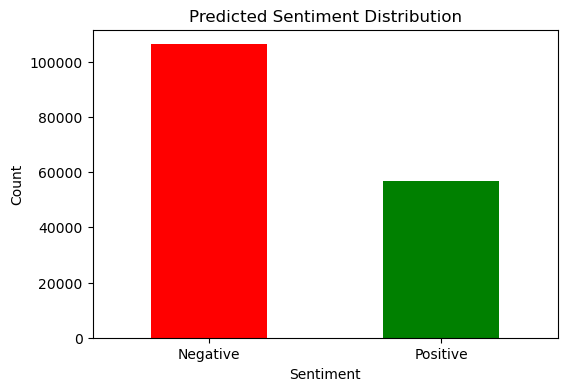

In [20]:
import matplotlib.pyplot as plt

# Plot the distribution of predicted sentiments
plt.figure(figsize=(6, 4))
df['predicted_sentiment'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()


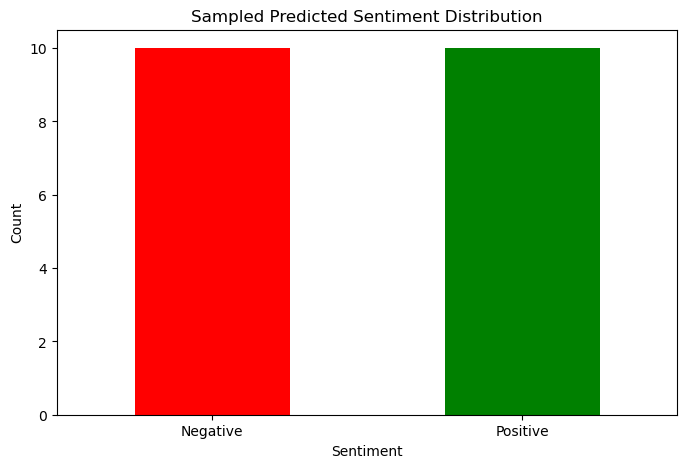

In [26]:
import matplotlib.pyplot as plt

# Sample 10 positive and 10 negative tweets
sampled_positive_tweets = df[df['predicted_sentiment'] == 1].sample(n=10, random_state=42)
sampled_negative_tweets = df[df['predicted_sentiment'] == 0].sample(n=10, random_state=42)

# Concatenate the sampled tweets
sampled_tweets = pd.concat([sampled_positive_tweets, sampled_negative_tweets])

# Plot the distribution of sampled sentiments
plt.figure(figsize=(8, 5))
sampled_tweets['predicted_sentiment'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title('Sampled Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()


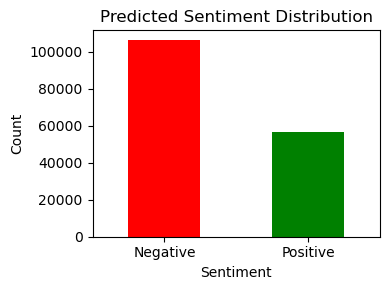

In [27]:
import matplotlib.pyplot as plt

# Plot the distribution of predicted sentiments for all tweets
plt.figure(figsize=(4, 3))
df['predicted_sentiment'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.tight_layout()
plt.show()
